# Comparison to analytic solution

 Use python pandas modules to load data, use matplotlib to plot the results. Write a python modules for the analytic reference solution between two disks, put it into the modules folder and import it here. You can also write latex formula here if required $a^2 + b^2 = c^2$.
 
# Theory of the analytical solution

 The system describes the flow between two finite disks(Radius = $R$) enclosed by a cylinder. The top disk is rotating with a constant angular velocity $\Omega$, while the bottom disk and the side wall are held fix. The dimensionless Navier-Stokes equations for this flow in the cylindycal coordinate system $(r', \phi', z')$ are,<p>
 $u\frac{\partial \Gamma}{\partial r}+w\frac{\partial \Gamma}{\partial z} = (Re)^{-1}(\nabla^2 \Gamma - \frac{2}{r}\frac{\partial \Gamma}{\partial r}) \tag{1}$
 $u\frac{\partial \zeta}{\partial r}+w\frac{\partial \zeta}{\partial z} -\frac{u\zeta}{r} - \frac{2\Gamma}{r^3}\frac{\partial \Gamma}{\partial z}= (Re)^{-1}(\nabla^2 \zeta - \frac{\zeta}{r^2}) \tag{2}$
 $\nabla^2 \psi - \frac{2}{r} \frac{\partial \psi}{\partial r} = r\zeta \tag{3}$
 where
 $\Gamma = vr\tag{4}$
 $\zeta = \frac{\partial u}{\partial z} - \frac{\partial w}{\partial r}\tag{5}$
 $Re = \frac{\Omega R^2}{\nu}\tag{6}$
 $\nabla^2 = \frac{\partial^2}{\partial r^2} + r^{-1}\frac{\partial}{\partial r} + \frac{\partial^2}{\partial z^2}\tag{7}$
 with 
 $u = r^{-1}\frac{\partial \psi}{\partial z}\tag{8}$
 $w = -r^{-1}\frac{\partial \psi}{\partial r}\tag{9}$
 in which the following variables are defined to be dimensionless by:
 $z = \frac{z'}{R}\tag{10}$
 $r = \frac{r'}{R}\tag{11}$
 $u = \frac{U}{\Omega R}\tag{12}$
 $v = \frac{V}{\Omega R}\tag{13}$
 where (U, V, W) are the components of the velocity field.
    
 For the case with $Re<10$, it is observed that:
 $u \ll 1, w \ll 1, \Gamma \sim1$. Thus Eqs. (1)-(3) can be reduced to:
 $\nabla^2 \Gamma - \frac{2}{r}\frac{\partial \Gamma}{\partial r} = 0\tag{14}$
 $\nabla^2 \zeta - \frac{\zeta}{r^2} = -\frac{2\Gamma}{r^3}\frac{\partial \Gamma}{\partial z}Re\tag{15}$  
 $\nabla^2 \psi - \frac{2}{r}\frac{\partial \psi}{\partial r} = r\zeta\tag{16}$
 Since the bottom stationary disk is at $z = 0$ while the top rotating disk is at $z = \beta$ where $\beta = \frac{H}{R}$ donates the ratio of the height to the radius of the wedge, the boundary conditions are
 $\Gamma(0,z) = 0 \tag{17}$
 $\Gamma(r,0) = 0 \tag{18}$
 $\Gamma(r,\beta) = r^2 \tag{19}$ 
 $\Gamma(1,z) = 0 \tag{20}$
 Therefore the solution is 
 $v = \frac{\Gamma}{r} = \sum_{n = 1}^{\infty}2\frac{J_1(\alpha_n r)sinh(-\alpha_n z)}{\alpha_n sinh(\alpha_n \beta)J_0(\alpha_n)}\tag{21}$
 where $\alpha_n$ is the $n$th positive zero of the Bessel function $J_1$. According to eqation (13), the required analytic solution of $v_{\phi}(r)$ is expressed as 
 $v_{\phi}(r) = \Omega R\sum_{n = 1}^{\infty}2\frac{J_1(\alpha_n r)sinh(-\alpha_n z)}{\alpha_n sinh(\alpha_n \beta)J_0(\alpha_n)}\tag{22}$
    
### REFERENCES
 PAO, H. P. 1972 Numerical solution of the Navier-Stokes equations for flows in the disk-cylinder system. Phys. Fluids 15, 4-11. 

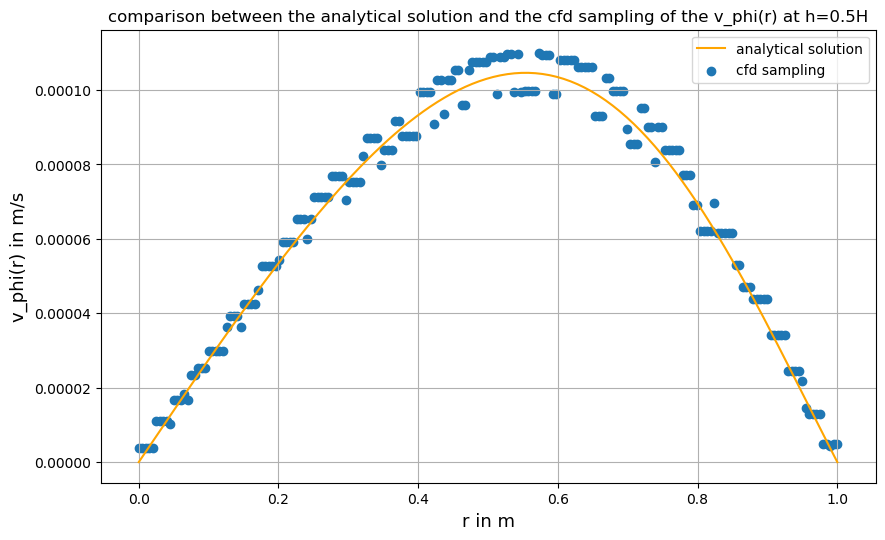

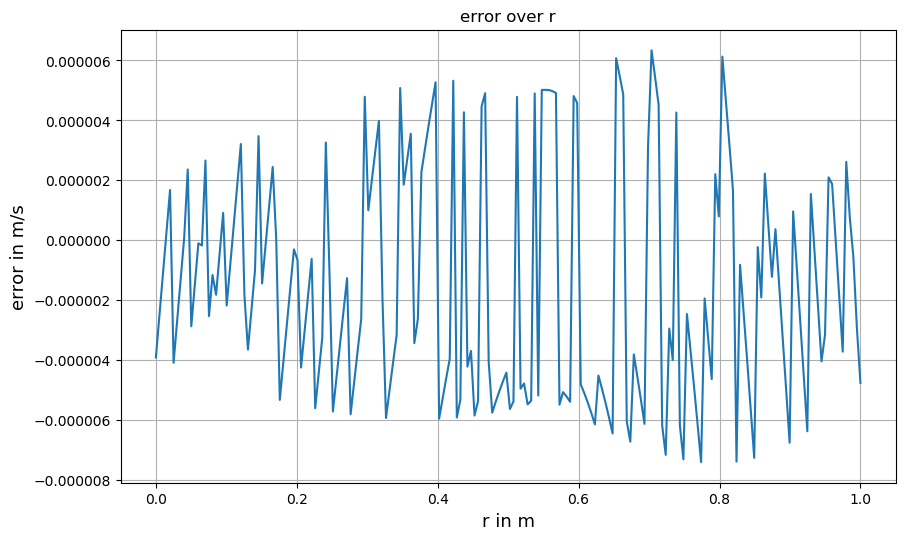

In [15]:
%matplotlib inline 
# this above line is required to show plots here
# plotting of a linear function (the above line is required to )
import matplotlib.pyplot as plt
import numpy as np # please install numpy and use it
import pandas as pd
import sys, os

# make the modules available
sys.path.insert(1, os.getcwd() + '/../modules/')
import analytic.rotatingDiscsFlow as rdf

# (u,v,w) corresponds to (r,theta,z)

cfd_data = pd.read_csv("../cases/wedge/postProcessing/sampleLine/0.1/data_U.csv")
v_phi_r_cfd = cfd_data['U_1']


H = 1e-3
R = 1e-3
omega = 1
z = 0.5*H/R
r = np.linspace(0,R,200)/R

v_phi_r_exact = rdf.rotatingflow(r, z, R, H, omega)

fig1 = plt.figure(dpi=100, figsize=(10,6))

plt.plot(r,v_phi_r_exact, color = 'orange')
plt.scatter(r, v_phi_r_cfd)
plt.title('comparison between the analytical solution and the cfd sampling of the v_phi(r) at h=0.5H')
plt.xlabel('r in m', fontsize = 13)
plt.ylabel('v_phi(r) in m/s', fontsize = 13)
plt.legend(['analytical solution', 'cfd sampling'])
plt.grid()

fig2 = plt.figure(dpi=100, figsize=(10,6))
plt.plot(r,v_phi_r_exact - v_phi_r_cfd)
plt.title('error over r')
plt.xlabel('r in m', fontsize = 13)
plt.ylabel('error in m/s', fontsize = 13)

plt.grid()
plt.show()

l1_norm = sum(abs(v_phi_r_exact - v_phi_r_cfd))
l2_norm = np.sqrt(sum((v_phi_r_exact - v_phi_r_cfd)**2))
linf_norm = max(abs(v_phi_r_exact - v_phi_r_cfd))

In [16]:
l1_norm

0.0007213262595310728

In [17]:
l2_norm

5.767943801272152e-05

In [18]:
linf_norm

7.397457975372697e-06